In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score # you know what

%matplotlib inline

In [13]:
dataset = pd.read_csv('../input/Boston1.csv')
dataset.head()

print(dataset.keys())
print(type(dataset))
print(dataset.shape)

# check if we have some null values
dataset.isnull().sum()

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
(506, 14)


crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

CRIM: Per capita crime rate by town
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
INDUS: Proportion of non-retail business acres per town
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX: Nitric oxide concentration (parts per 10 million)
RM: Average number of rooms per dwelling
AGE: Proportion of owner-occupied units built prior to 1940
DIS: Weighted distances to five Boston employment centers
RAD: Index of accessibility to radial highways
TAX: Full-value property tax rate per $10,000
PTRATIO: Pupil-teacher ratio by town
B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
LSTAT: Percentage of lower status of the population
MEDV: Median value of owner-occupied homes in $1000s

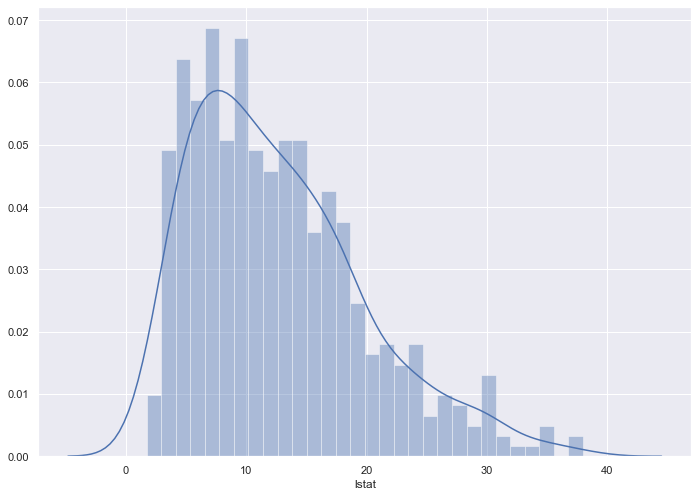

In [93]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(dataset['lstat'], bins=30)

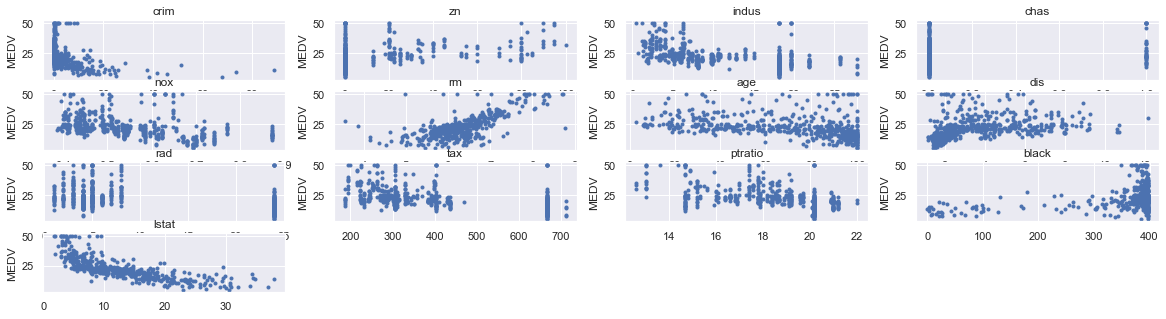

In [92]:
plt.figure(figsize=(20, 5))

#features = ['lstat', 'rm']
features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat']
target = dataset['medv']

for i, col in enumerate(features):
    plt.subplot(4, 4, i+1)
    x = dataset[col]
    y = target
    plt.scatter(x, y, marker='.')
    plt.title(col)
    #plt.xlabel(col)
    plt.ylabel('MEDV')

In [39]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()


In [60]:
print(type(boston_dataset.target))

<class 'numpy.ndarray'>


<class 'pandas.core.frame.DataFrame'>


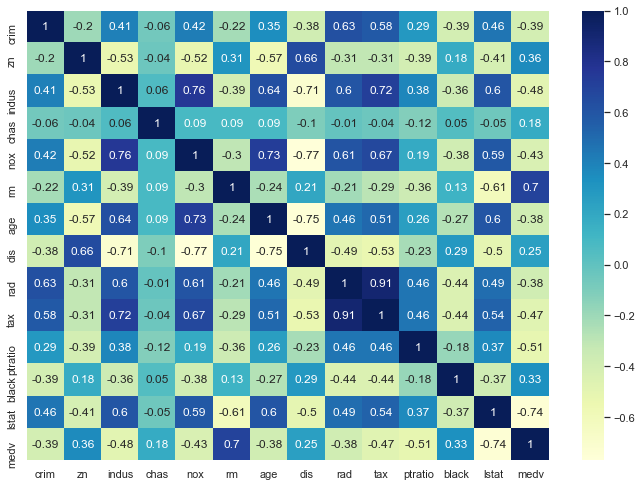

In [66]:
correlation_matrix = dataset.corr().round(2)
print(type(correlation_matrix))
correlation_matrix.head
sns.heatmap(data=correlation_matrix, annot=True, cmap="YlGnBu")

In [94]:
X = dataset[['rm', 'lstat']] 
Y = dataset[['medv']]

In [95]:
print(X.head)
print(Y.head)

<bound method NDFrame.head of         rm  lstat
0    6.575   4.98
1    6.421   9.14
2    7.185   4.03
3    6.998   2.94
4    7.147   5.33
..     ...    ...
501  6.593   9.67
502  6.120   9.08
503  6.976   5.64
504  6.794   6.48
505  6.030   7.88

[506 rows x 2 columns]>
<bound method NDFrame.head of      medv
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
..    ...
501  22.4
502  20.6
503  23.9
504  22.0
505  11.9

[506 rows x 1 columns]>


In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404, 1)
(102, 1)


In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186954
